In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [4]:
data = pd.read_csv('iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the Data

In [5]:
x = data.copy()

In [7]:
kmeans = KMeans(2,n_init=10)
kmeans.fit(x)

KMeans(n_clusters=2, n_init=10)

## Clustering

In [8]:
cluster = x.copy()
cluster['cluster_pred'] = kmeans.fit_predict(x)

### Unscalled Data

Text(0, 0.5, 'Width of Sepal')

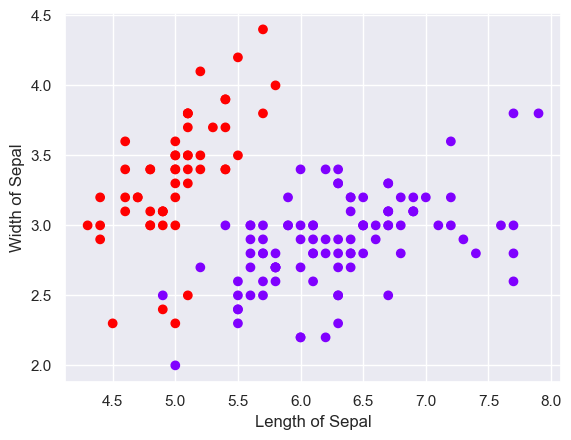

In [9]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=cluster['cluster_pred'],cmap='rainbow')
plt.xlabel('Length of Sepal')
plt.ylabel('Width of Sepal')

### Scaled Data

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [11]:
kmeans_scaled =KMeans(2)
kmeans_scaled.fit(x_scaled)

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [12]:
clusters_scaled = data.copy()
clusters_scaled['cluster_pred'] = kmeans_scaled.fit_predict(x_scaled)

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


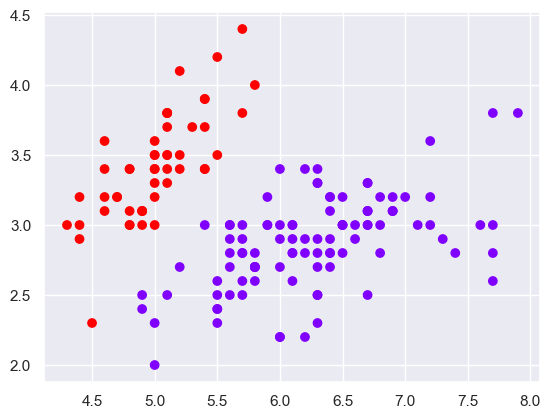

In [13]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

## Elbow Method

In [14]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packa

In [15]:
wcss

[600.0000000000001,
 223.73200573676348,
 140.96581663074699,
 114.6802477454172,
 91.19197002146464,
 80.71240316563079,
 72.40204936820271,
 63.29740897957998,
 55.658075745766084]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

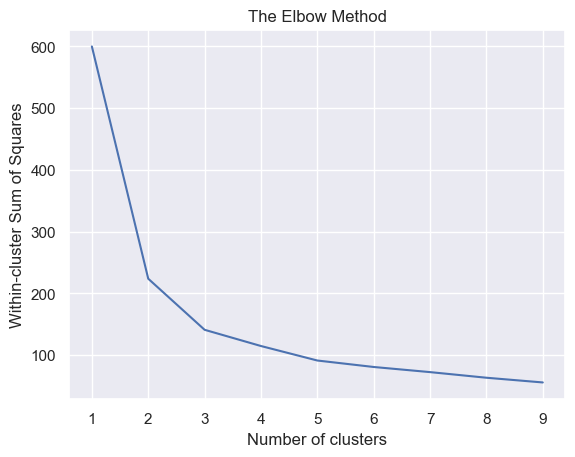

In [16]:
nClust = range(1,10)
plt.plot(nClust,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

### Exploring the number of Cluster

In [19]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Width of Sepal')

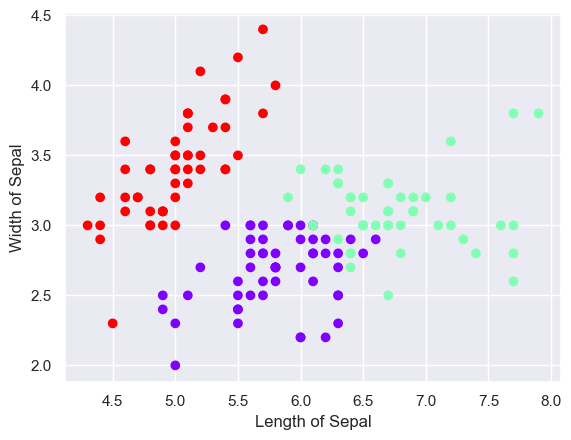

In [20]:
plt.scatter(cluster_new['sepal_length'],cluster_new['sepal_width'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Length of Sepal')
plt.ylabel('Width of Sepal')
